In [1]:
!pip install python-graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement python-graphviz (from versions: none)
ERROR: No matching distribution found for python-graphviz


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
data= pd.read_csv("enfermedades_cardiacas.csv")

In [10]:
data

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [13]:
X = data.drop(columns = "HeartDiseaseorAttack")   #variables predictora
y = data["HeartDiseaseorAttack"] 

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=138)

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
arbol = DecisionTreeClassifier()

In [21]:
arbol.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(0.5580914115446025, 0.9880952380952381, 'NoDocbcCost <= 3.5\ngini = 0.17\nsamples = 190260\nvalue = [172415, 17845]\nclass = tiene'),
 Text(0.29755733271387363, 0.9642857142857143, 'Sex <= 9.5\ngini = 0.116\nsamples = 157562\nvalue = [147843, 9719]\nclass = tiene'),
 Text(0.14631275712444605, 0.9404761904761905, 'HeartDiseaseorAttack <= 0.5\ngini = 0.056\nsamples = 104667\nvalue = [101666, 3001]\nclass = tiene'),
 Text(0.08018389945255387, 0.9166666666666666, 'Smoker <= 0.5\ngini = 0.029\nsamples = 75222\nvalue = [74125, 1097]\nclass = tiene'),
 Text(0.0474674451332273, 0.8928571428571429, 'Sex <= 6.5\ngini = 0.027\nsamples = 74708\nvalue = [73698, 1010]\nclass = tiene'),
 Text(0.022581167876722052, 0.8690476190476191, 'PhysHlth <= 0.5\ngini = 0.011\nsamples = 40928\nvalue = [40695, 233]\nclass = tiene'),
 Text(0.015550047637188832, 0.8452380952380952, 'NoDocbcCost <= 2.5\ngini = 0.01\nsamples = 39958\nvalue = [39756, 202]\nclass = tiene'),
 Text(0.005390626427951965, 0.821428571

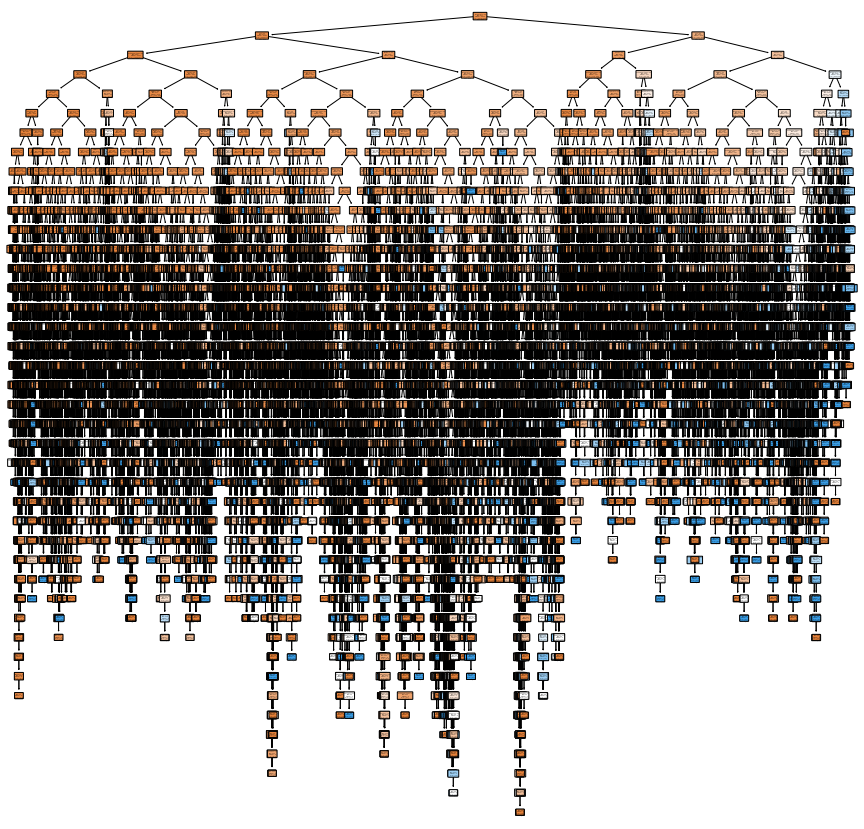

In [22]:
from sklearn import tree
class_names = ['tiene','no_tiene' ]
plt.figure(figsize = (15,15))
tree.plot_tree(arbol, feature_names=data.columns[:-1],filled=True,rounded=True, class_names=class_names)

In [23]:
from sklearn.metrics import accuracy_score

y_pred_train = arbol.predict(X_train)
exactitud_train_arbol = accuracy_score(y_train, y_pred_train)
exactitud_train_arbol

0.9961368653421634

In [24]:
y_pred_arbol = arbol.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

matriz_arbol = confusion_matrix(y_test, y_pred_arbol)
sns.heatmap(matriz_arbol, annot=True)
plt.xlabel("Etiquetas predichas")
plt.ylabel("Etiquetas reales")